# Grid

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colormaps
colors = colormaps['Set2']

def get_files(results_dir):
    # Gather all training stats files
    training_files = []
    for root, dirs, files in os.walk(results_dir):
        for file in files:
            if file.endswith("training_stats.npy"):
                training_files.append(os.path.join(root, file))
    return training_files

def load_training_stats(filepath):
    """Load training statistics from a .npy file."""
    return np.load(filepath, allow_pickle=True).item()

def get_label(file):
    # Extract parameters for labeling
    parts = file.split('/')
    if len(parts) > 13:
        q_ratio = parts[-3].split('_')[1]  # Assuming format slide_<bool>/qr_<value>
        ops = parts[-2].split('_')[1]       # Assuming format ops_<value>
        # print(f"Q-Ratio: {q_ratio}, Ops: {ops}")
        label = f"Q-Ratio: {q_ratio}, Sampling Ops: {ops}"

    if 'slide_False' in file:
        label = 'xmin_mid Baseline'
    if 'slide' not in file:
        label = 'TempBalance Baseline'
    return label

# Function to check lengths and print diagnostics
def check_lengths(*arrays):
    """Check if all arrays have the same length and print their lengths."""
    lengths = [len(arr) for arr in arrays]
    min_length = min(lengths)
    if len(set(lengths)) != 1:
        # print("Error: Mismatch in lengths:")
        for i, length in enumerate(lengths):
            # print(f"Array {i}: Length {length}")
            continue
        return False, min_length
    return True, min_length

# Function to plot accuracy
def plot_accuracy(epochs, train_acc, test_acc, label, color):
    """Plot training and test accuracy."""
    valid, min_length = check_lengths(epochs, train_acc, test_acc)
    if not valid:
        epochs = epochs[:min_length]
        train_acc = train_acc[:min_length]
        test_acc = test_acc[:min_length]

    plt.plot(epochs, train_acc, label=None, linestyle='--', color=color)
    plt.plot(epochs, test_acc, label=f'{label}', color=color)

# Function to plot loss
def plot_loss(epochs, train_loss, test_loss, label, color):
    """Plot training and test loss."""
    valid, min_length = check_lengths(epochs, train_loss, test_loss)
    if not valid:
        epochs = epochs[:min_length]
        train_loss = train_loss[:min_length]
        test_loss = test_loss[:min_length]

    plt.plot(epochs, train_loss, label=None, linestyle='--', color=color)
    plt.plot(epochs, test_loss, label=f'{label}', color=color)

def plot_results(training_files, model, dataset, metric='acc'):

    y_low, y_high = 60, 80
    if 'loss' in metric:
        y_low, y_high = 0, 2
    desc = 'Accuracy' if 'acc' in metric else 'Loss'
    # Initialize a figure for plotting accuracy
    plt.figure(figsize=(12, 5))

    # Load and plot each experiment's results for accuracy
    for idx, file in enumerate(training_files):
        training_stats = load_training_stats(file)

        # Extract data
        epochs = np.arange(len(training_stats[f'train_{metric}']))
        train_res = training_stats[f'train_{metric}']
        test_res = training_stats[f'test_{metric}']

        label = get_label(file)

        color = colors(idx % colors.N)  # Get a distinct color, wrapping around if necessary

        # Plot accuracy
        if 'loss' in metric:
            plot_loss(epochs, train_res, test_res, label, color)
        else:
            plot_accuracy(epochs, train_res, test_res, label, color)

    # Customize and show the accuracy plot
    plt.title(f'{model.capitalize()} on {dataset.upper()}: Training and Test {desc}')
    plt.xlabel('Epochs')
    plt.ylabel(desc)
    plt.ylim(y_low, y_high)
    plt.legend()
    plt.grid()
    plt.show()

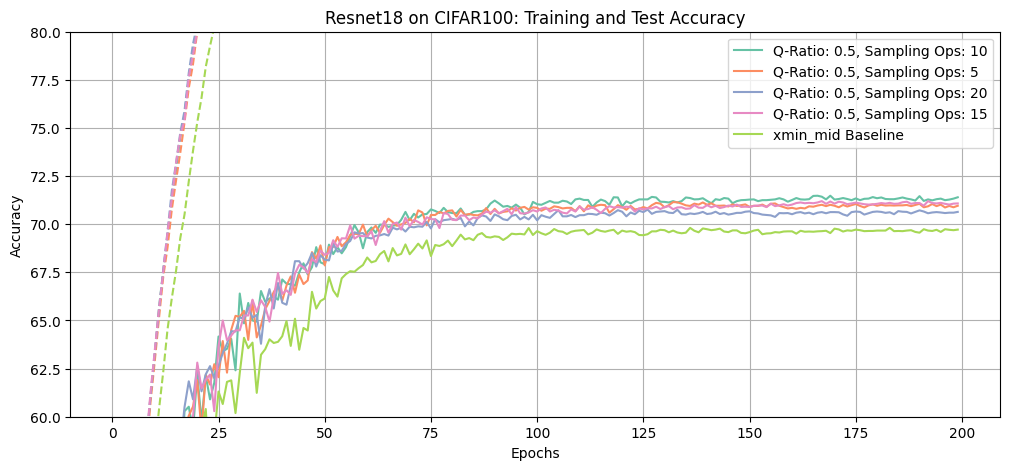

In [16]:
qr_list = [0.5, 1.0, 1.5, 2.0]
qr_list = [0.5]
for qr in qr_list:
    model = 'resnet18'
    dataset = 'cifar100'
    results_dir = f'/jumbo/yaoqingyang/kinshuk/TempBalance/results/low_lr/{model}/{dataset}/slide_True/row_100/qr_{qr}'

    training_files = get_files(results_dir)

    tb_baseline_file = f'/jumbo/yaoqingyang/kinshuk/TempBalance/results/low_lr/{model}/{dataset}/slide_False/training_stats.npy'
    training_files.append(tb_baseline_file)

    plot_results(training_files, model, dataset, metric='acc')
    # plot_results(training_files, model, dataset, metric='loss')

# Experimental

In [17]:
# Function to check lengths and print diagnostics
def check_lengths(*arrays):
    """Check if all arrays have the same length and print their lengths."""
    lengths = [len(arr) for arr in arrays]
    if len(set(lengths)) != 1:
        print("Error: Mismatch in lengths:")
        for i, length in enumerate(lengths):
            print(f"Array {i}: Length {length}")
        return False
    return True

# Function to plot accuracy
def plot_accuracy(epochs, train_acc, test_acc):
    test_acc = test_acc[:len(train_acc)]
    """Plot training and test accuracy."""
    if not check_lengths(epochs, train_acc, test_acc):
        return

    plt.figure(figsize=(12, 5))
    plt.plot(epochs, train_acc, label='Train Accuracy', color='blue')
    plt.plot(epochs, test_acc, label='Test Accuracy', color='orange')
    plt.title('Training and Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# Function to plot loss
def plot_loss(epochs, train_loss, test_loss):
    test_loss = test_loss[:len(train_loss)]
    """Plot training and test loss."""
    if not check_lengths(epochs, train_loss, test_loss):
        return

    plt.figure(figsize=(12, 5))
    plt.plot(epochs, train_loss, label='Train Loss', color='blue')
    plt.plot(epochs, test_loss, label='Test Loss', color='orange')
    plt.title('Training and Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# Function to plot learning rate
def plot_learning_rate(epochs, current_lr):
    """Plot learning rate over epochs."""
    if not check_lengths(epochs, current_lr):
        return

    plt.figure(figsize=(12, 5))
    plt.plot(epochs, current_lr, label='Current Learning Rate', color='green')
    plt.title('Learning Rate Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Learning Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Function to plot elapsed time
def plot_elapsed_time(epochs, elapsed_time):
    """Plot elapsed time over epochs."""
    if not check_lengths(epochs, elapsed_time):
        return

    plt.figure(figsize=(12, 5))
    plt.plot(epochs, elapsed_time, label='Elapsed Time', color='purple')
    plt.title('Elapsed Time Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Time (seconds)')
    plt.legend()
    plt.grid()
    plt.show()

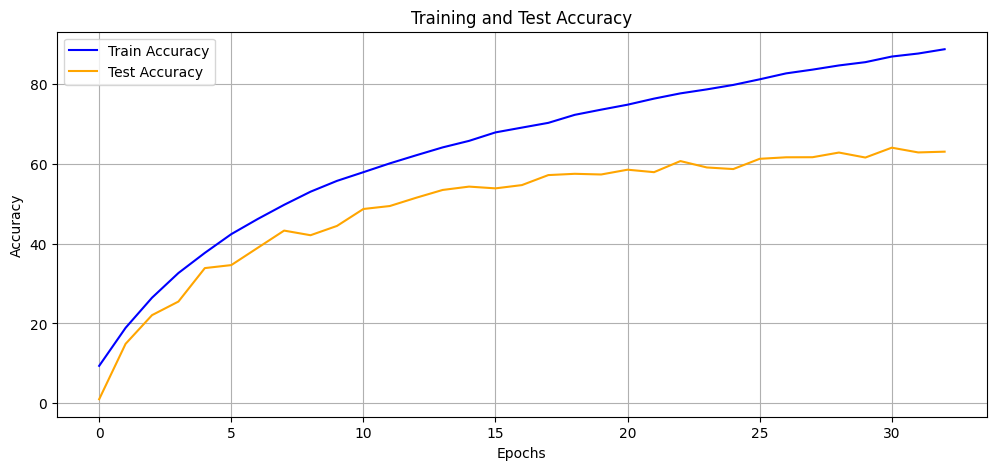

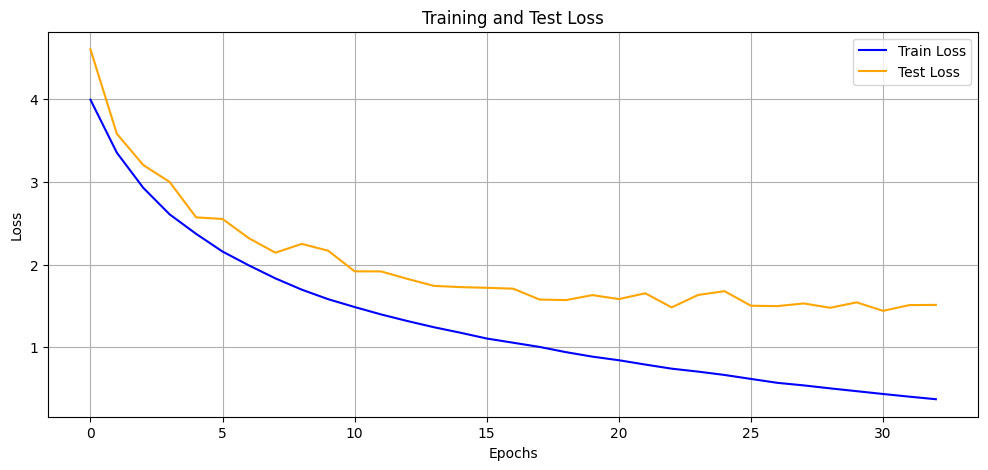

In [18]:
model = 'resnet18'
dataset = 'cifar100'
results_dir = f'/jumbo/yaoqingyang/kinshuk/TempBalance/results/test/{model}/{dataset}/slide_False/training_stats.npy'

# Load training statistics
training_stats = load_training_stats(results_dir)

# Extract data
epochs = np.arange(len(training_stats['train_acc']))
train_acc = training_stats['train_acc']
test_acc = training_stats['test_acc']
train_loss = training_stats['train_loss']
test_loss = training_stats['test_loss']
current_lr = training_stats['current_lr']
elapsed_time = training_stats['elapsed_time']

# Plotting
plot_accuracy(epochs, train_acc, test_acc)
plot_loss(epochs, train_loss, test_loss)
# plot_learning_rate(epochs, current_lr)
# plot_elapsed_time(epochs, elapsed_time)